In [1]:
print("welcome")

welcome


##  pubg game  prediction 

<center><img src = "https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnE0YmZoMnV2bjBzdnM5YnhwaTBhdzhrbWdpMmtvZXo3MDB1Yzc0dSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/GfCaemm9bltYQFliLp/giphy.webp"></center>

##  table content 

##  importing the  libery  

In [2]:
import  numpy as np 
import pandas  as pd 


import matplotlib.pyplot  as plt 
%matplotlib  inline 
plt.rcParams["figure.figsize"] = (16 , 6) 

import seaborn as sns 

import warnings  
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
df  =  pd.read_csv("PUBG_Game_Prediction_data.csv")


In [4]:
df.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
df.shape

(4446966, 29)

In [7]:
df.describe()
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
 df[df["winPlacePerc"].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
df.drop(2744604 , inplace=True)

In [10]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [11]:
df['playedJoin'] =  df.groupby('matchId')['matchId'].transform('count')  #  it  give the new data  column   of the  how many player is join  for that  machid  intotal  

In [12]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playedJoin
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


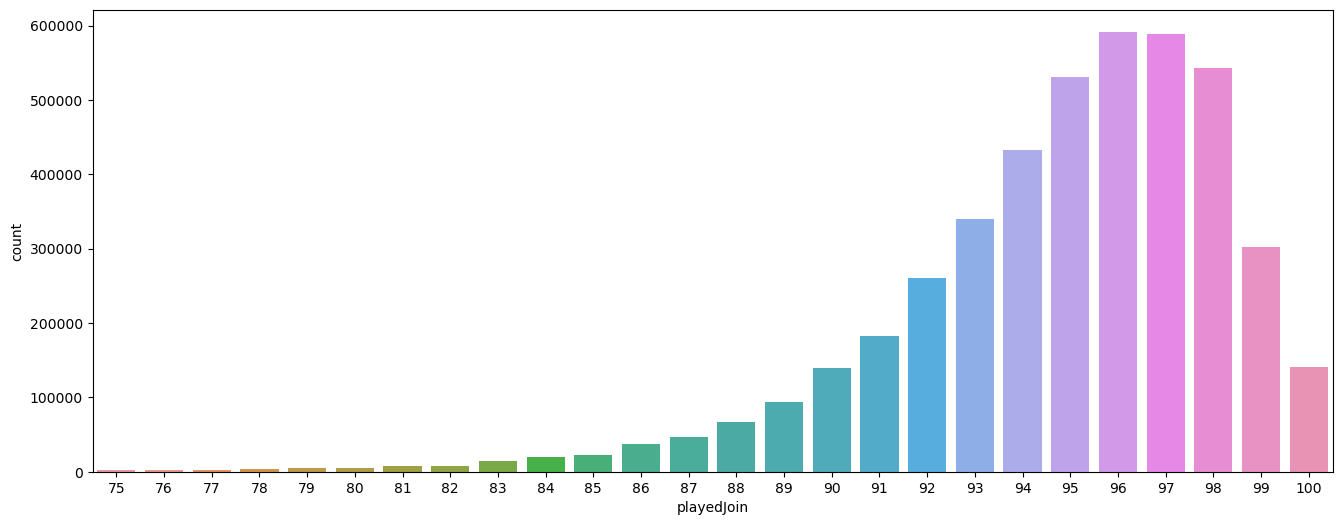

In [13]:

# Filter the DataFrame to include rows where 'playedJoin' is >= 75
filtered_df = df[df['playedJoin'] >= 75]

# Create a count plot for the 'playedJoin' column using the filtered DataFrame
sns.countplot(x='playedJoin', data=filtered_df)

# Show the plot
plt.show()

##  for the data set  it  give the in how many matches n number of player play 
##  for example for around  1e6 matches the  96 playered play  the game 

##  analysis  


###  normalization 

In [14]:
df['total_dist'] =  df['rideDistance'] +  df['walkDistance'] +  df['swimDistance']

#  it give the how many  diatances  the player traver  in the match 

In [15]:
df['kills_without_moving'] =  ((df['kills'] >0) &  (df['total_dist'] ==0))

In [16]:
df['kills_without_moving']

0          False
1          False
2          False
3          False
4          False
           ...  
4446961    False
4446962    False
4446963    False
4446964    False
4446965    False
Name: kills_without_moving, Length: 4446965, dtype: bool

In [17]:
(df['kills_without_moving']==False).sum()

4445430

In [18]:
df.drop(df[df['kills_without_moving']==True].index , inplace=True)

In [19]:
df.shape  ##  it  remove the invalid  parameter  

(4445430, 32)

## remove the  extraordinary  roadkill 

In [20]:
df[df['roadKills']>6].shape   ##  26  such  cases  where he kill by just  a car which impossible  

(26, 32)

In [21]:
df.drop(df[df['roadKills']>6].index , inplace=True )

In [22]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playedJoin,total_dist,kills_without_moving
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0,0,244.80,1,1466,0.4444,96,244.8000,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0,0,1434.00,5,0,0.6400,91,1445.0445,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0,0,161.80,2,0,0.7755,98,161.8000,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0,0,202.70,3,0,0.1667,91,202.7000,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0,0,49.75,2,0,0.1875,97,49.7500,False


##  check how many kill he do 

In [23]:
df[df['kills']>50].shape   ## this is the invalid  case generaly it not possible  

(13, 32)

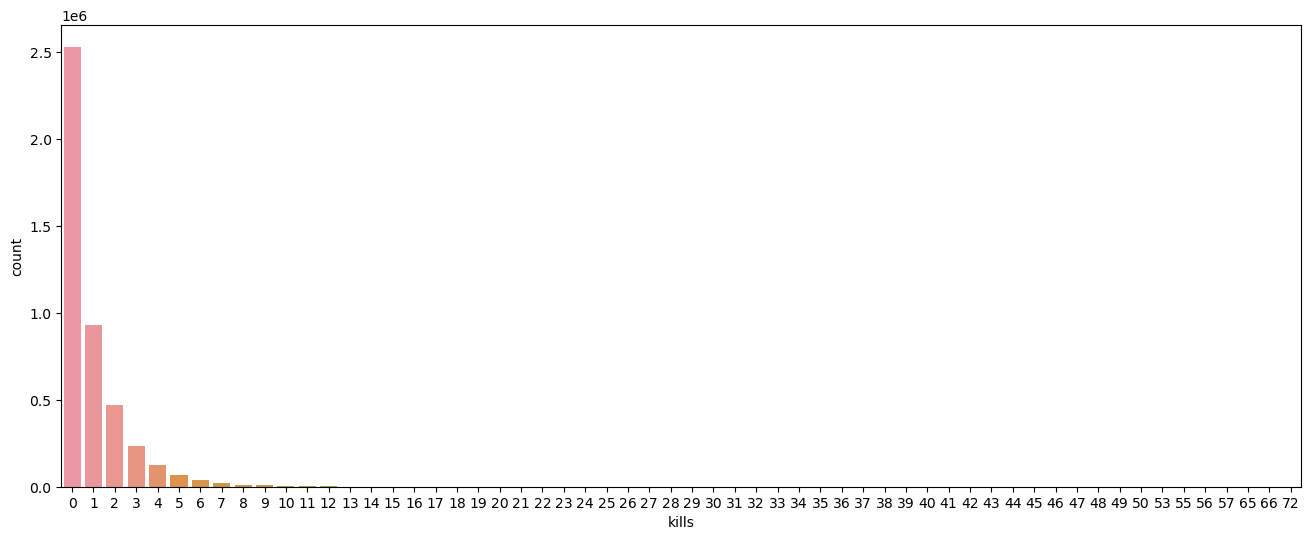

In [24]:

# Filter the DataFrame to include rows where 'playedJoin' is >= 75
filtered_df = df[df['kills'] >= 0]

# Create a count plot for the 'playedJoin' column using the filtered DataFrame
sns.countplot(x='kills', data=filtered_df)

# Show the plot
plt.show()

##  for the data set  it  give the in how many matches n number of player play 
##  for example for around  1e6 matches the  96 playered play  the game 

In [25]:
df[df['kills']>30].shape  ##  it  is  very  diff to  kill  >30  

(95, 32)

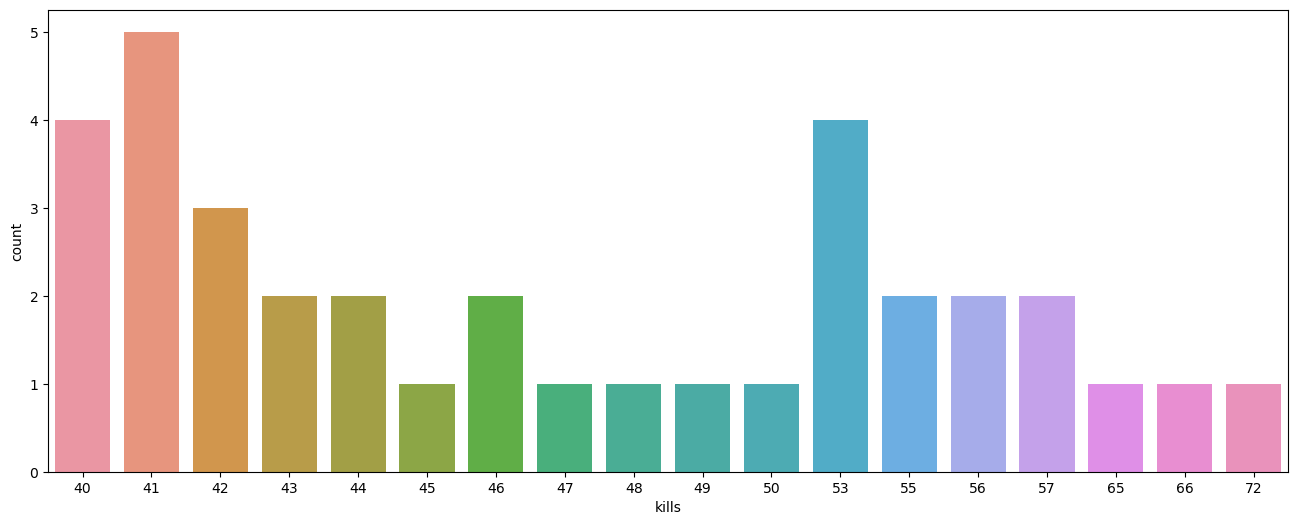

In [26]:
# Filter the DataFrame to include rows where 'playedJoin' is >= 75
filtered_df = df[df['kills'] >= 40]

# Create a count plot for the 'playedJoin' column using the filtered DataFrame
sns.countplot(x='kills', data=filtered_df)

# Show the plot
plt.show()

##  remove all the instant where the kill >30 

In [27]:
df.drop(df[df['kills']>30].index , inplace=True)   ##  remove just  row if u want to remove the  col use axis = 1  

In [28]:
df[df['kills']>30].shape

(0, 32)

In [29]:
df.shape  #  first one is row and second one the col name 


(4445309, 32)

##  count the headshot ratio 

In [30]:
df.columns.tolist()

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc',
 'playedJoin',
 'total_dist',
 'kills_without_moving']

In [31]:
df['headshot_rate'] =  df['headshotKills']/df['kills']
df['headshot_rate'] =  df['headshot_rate'].fillna(0)

In [32]:
df['headshot_rate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4446961    0.0
4446962    0.0
4446963    0.0
4446964    0.5
4446965    0.0
Name: headshot_rate, Length: 4445309, dtype: float64

<Axes: xlabel='headshot_rate', ylabel='Density'>

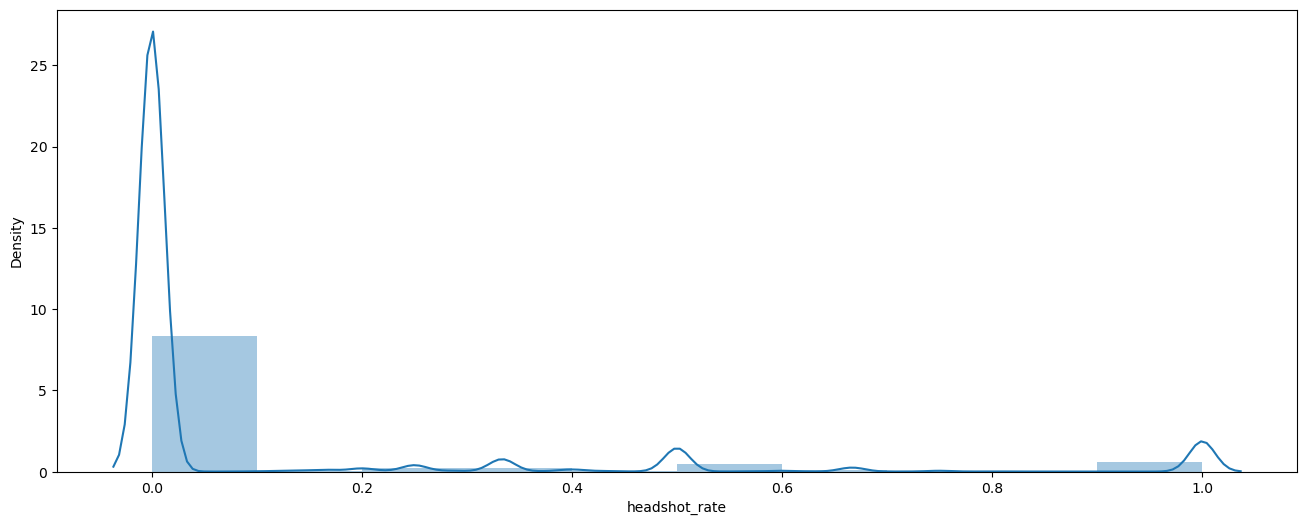

In [33]:
sns.distplot(df['headshot_rate'], bins=10)  ##  see  that avg is arount  1-2  

In [34]:
##  it is very  rare that  all  kill  is by headshot and lot of kill   then is hack

In [35]:
df["head_shot_bap"] = ((df['headshot_rate'] ==1) &  (df['kills']>8))

In [36]:
df[df['head_shot_bap']==True].shape    ##  so  38  is the invalid case kill >  8 and the all  are headshot 

(38, 34)

In [37]:
df.drop(df[df['head_shot_bap']==True].index ,  inplace = True )

In [38]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playedJoin,total_dist,kills_without_moving,headshot_rate,head_shot_bap
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,244.80,1,1466,0.4444,96,244.8000,False,0.0,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,1434.00,5,0,0.6400,91,1445.0445,False,0.0,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,161.80,2,0,0.7755,98,161.8000,False,0.0,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,202.70,3,0,0.1667,91,202.7000,False,0.0,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,49.75,2,0,0.1875,97,49.7500,False,0.0,False


In [39]:
df[df['head_shot_bap']==True].shape    ##  successfuly remove all  invalid headshot case 

(0, 34)

### longest  shot  range 

In [40]:
#1 km  is fine more than it is problem  
df.columns.tolist()
df[df['longestKill']>1000].shape   #  i.e  kill  in the range above than 1 km 

(18, 34)

####  kill more than 1 km is impossible

In [41]:
#remove those data 
df.drop(df[df['longestKill']>1000].index , inplace = True)  # we  are using the inplaces to  remove the  row 

In [42]:
df[df['longestKill']>1000].shape  ##  sucessfuly  remove  those  invalid case 

(0, 34)

##  weapon change    
###  person  change at max  10 weapon not more  than it 


In [43]:
df[df['weaponsAcquired']>=20].shape

(3147, 34)

In [44]:
#  drop this hacker  data '
df.drop(df[df['weaponsAcquired']>=20].index ,  inplace=True)

In [45]:
df[df['weaponsAcquired']>=20].shape

(0, 34)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4442106 entries, 0 to 4446965
Data columns (total 34 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Id                    object 
 1   groupId               object 
 2   matchId               object 
 3   assists               int64  
 4   boosts                int64  
 5   damageDealt           float64
 6   DBNOs                 int64  
 7   headshotKills         int64  
 8   heals                 int64  
 9   killPlace             int64  
 10  killPoints            int64  
 11  kills                 int64  
 12  killStreaks           int64  
 13  longestKill           float64
 14  matchDuration         int64  
 15  matchType             object 
 16  maxPlace              int64  
 17  numGroups             int64  
 18  rankPoints            int64  
 19  revives               int64  
 20  rideDistance          float64
 21  roadKills             int64  
 22  swimDistance          float64
 23  teamKills   

In [47]:
df.isnull().sum() #  no  null  value

Id                      0
groupId                 0
matchId                 0
assists                 0
boosts                  0
damageDealt             0
DBNOs                   0
headshotKills           0
heals                   0
killPlace               0
killPoints              0
kills                   0
killStreaks             0
longestKill             0
matchDuration           0
matchType               0
maxPlace                0
numGroups               0
rankPoints              0
revives                 0
rideDistance            0
roadKills               0
swimDistance            0
teamKills               0
vehicleDestroys         0
walkDistance            0
weaponsAcquired         0
winPoints               0
winPlacePerc            0
playedJoin              0
total_dist              0
kills_without_moving    0
headshot_rate           0
head_shot_bap           0
dtype: int64

##  to  see  the data  correlation 


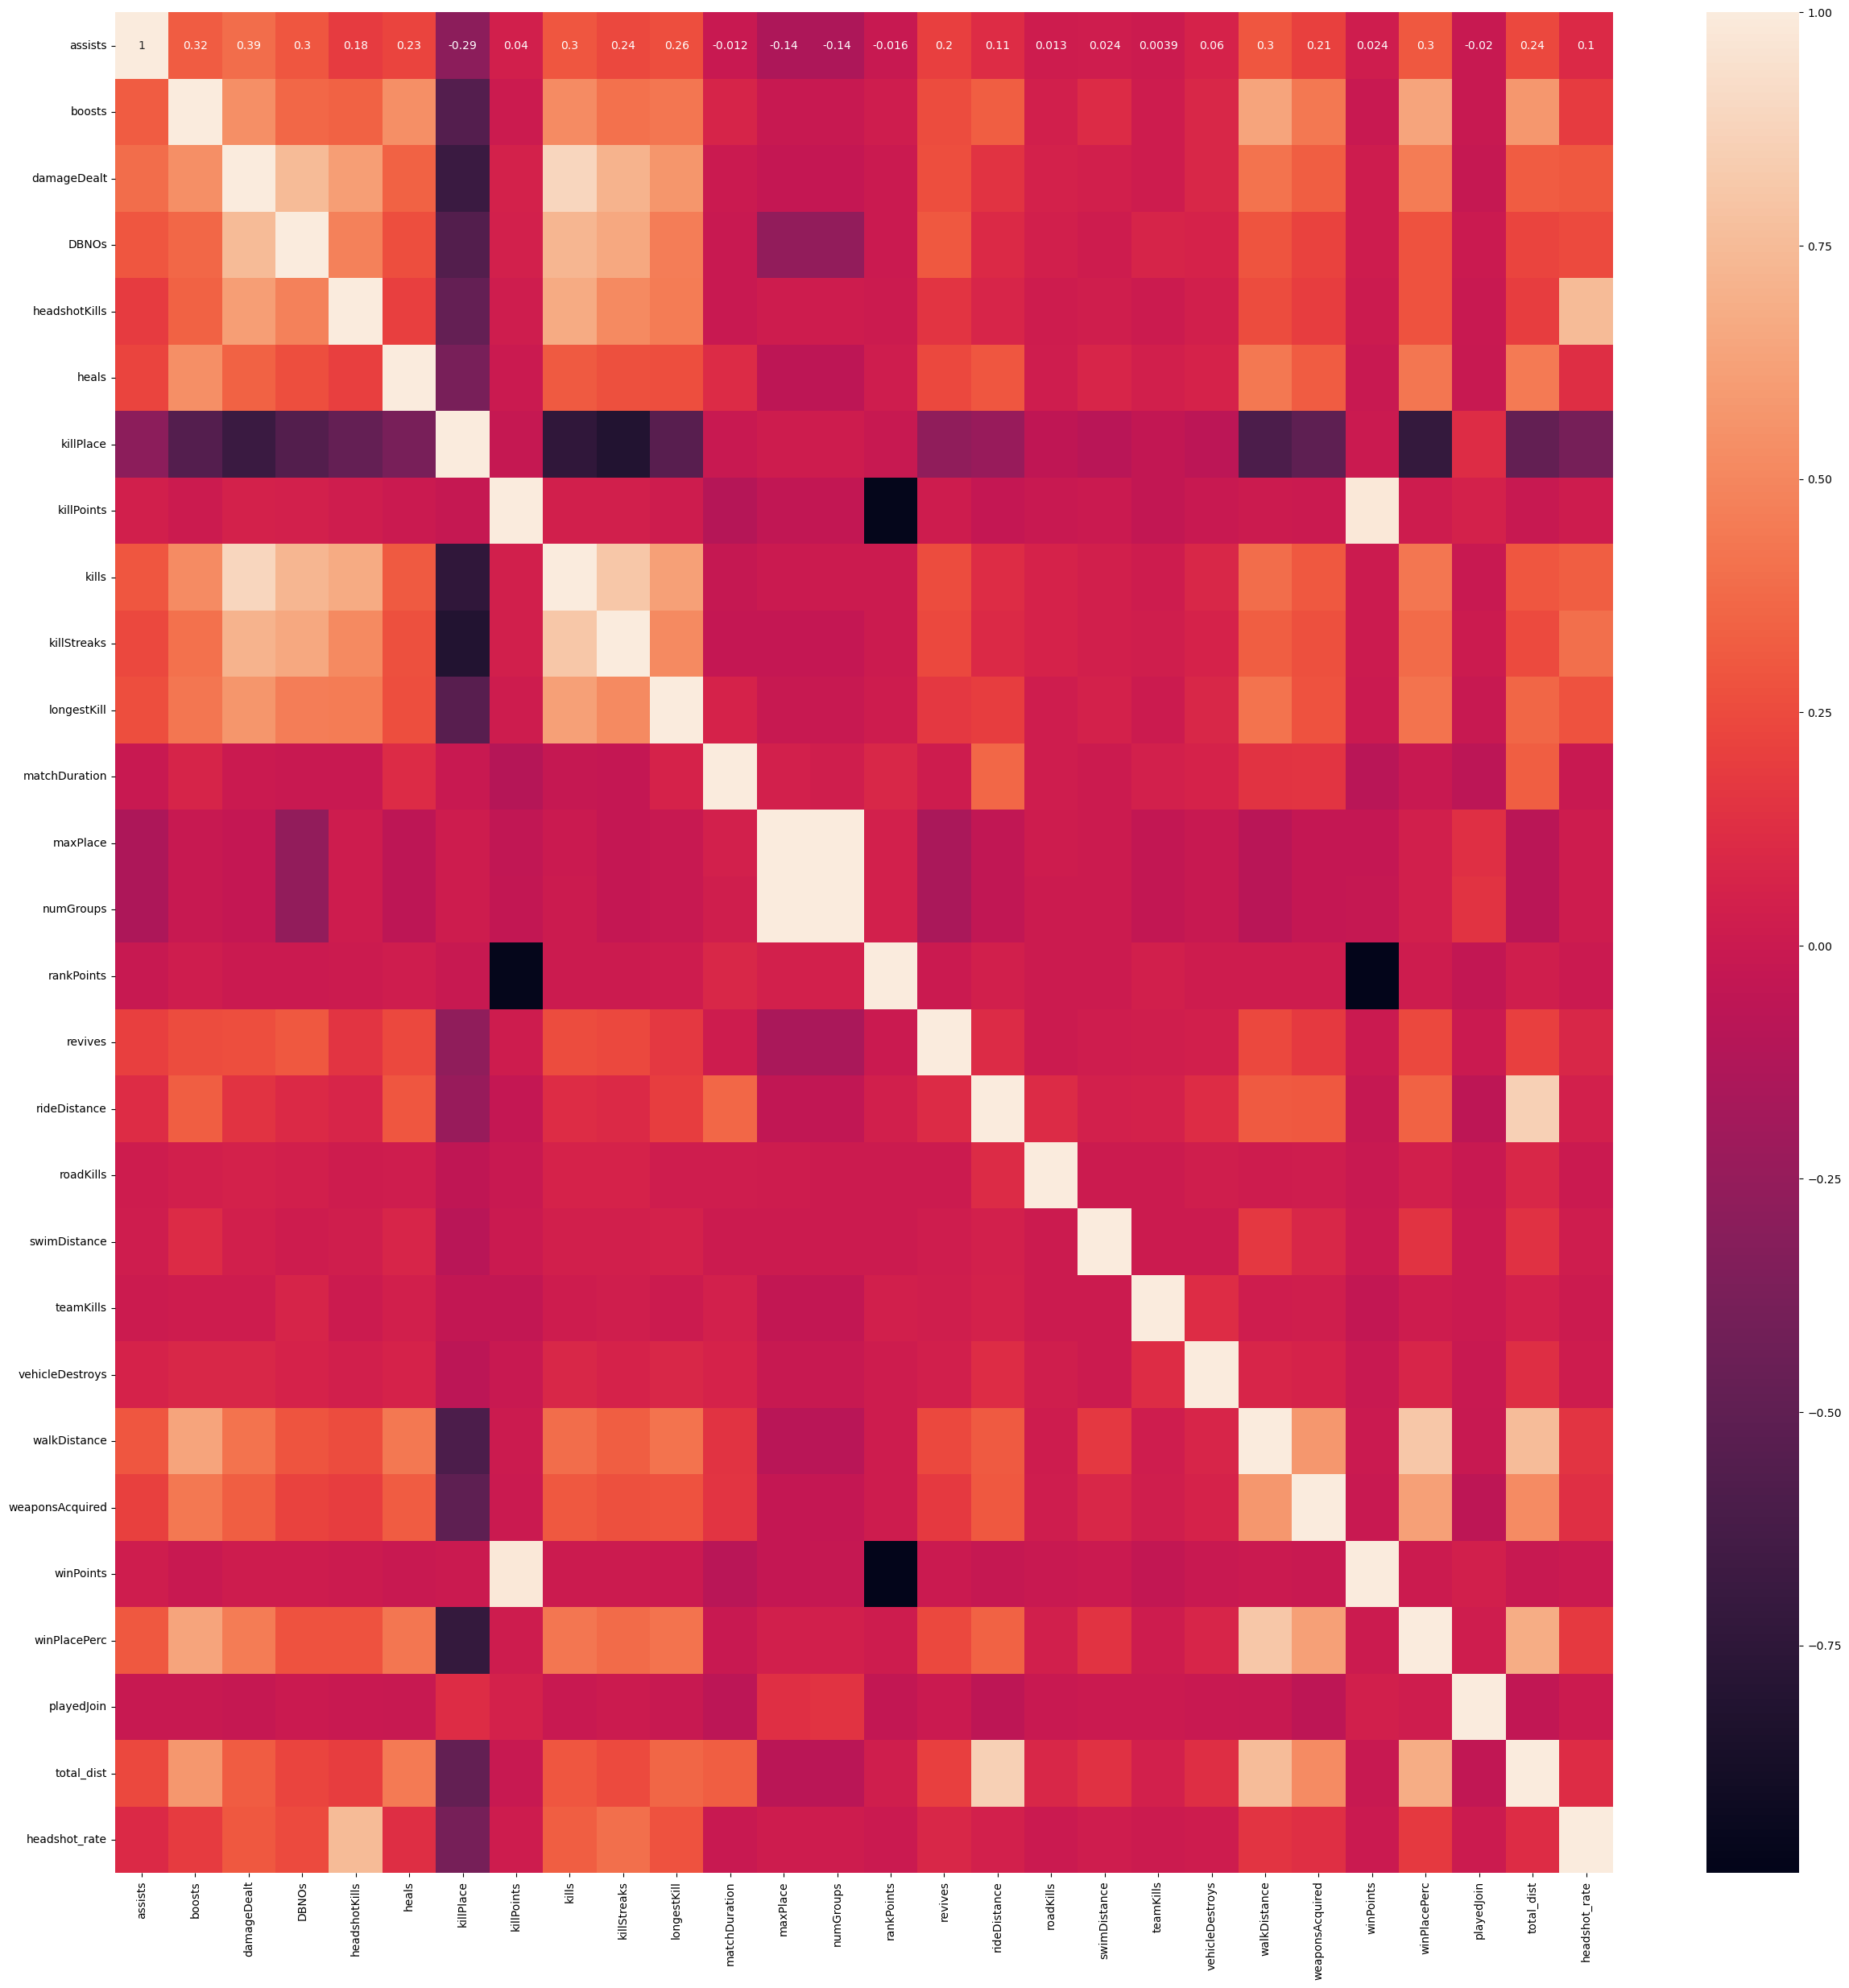

In [48]:

df_numeric = df.select_dtypes(include=[np.number])  #  it select the numberic dat  fron the df  to  df_numeric  


corr_matrix = df_numeric.corr()  #  then  generate  the  corr_matrix  

# Plot the heatmap
plt.figure(figsize=[30, 30])
sns.heatmap(corr_matrix, annot=True)   # put  the  corr_matrix in the  heatmap    
plt.show() 


###  this above  image is  help  to predict  for which factor  the other  things  depend on it 

In [49]:
normaliz =  (100 -  df['playedJoin'])/100 + 1
df['killNor'] =  df['kills']*normaliz 
df['damage_nor'] =  df['damageDealt']*normaliz 
df['max_place_normal'] =  df['maxPlace']*normaliz 
df['match-duration_normal'] =  df['matchDuration']*normaliz 
df['travel_dist'] =  df['walkDistance'] +  df['swimDistance'] + df['rideDistance']
df['heal_boost'] =  df['heals'] +  df['boosts'] 
df['assist'] =  df['assists'] +  df['revives']
# df['kills']
# df.to

In [50]:
df.head()
df.drop(columns =['kills' , 'damageDealt' ,  'maxPlace' , 'matchDuration' , 'walkDistance' , 'swimDistance' , 'rideDistance' , 'heals' , 'boosts' , 'assists' , 'revives' ])

,Id,groupId,matchId,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,...,kills_without_moving,headshot_rate,head_shot_bap,killNor,damage_nor,max_place_normal,match-duration_normal,travel_dist,heal_boost,assist
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,60,1241,0,0.00,squad-fpp,...,False,0.0,False,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,57,0,0,0.00,squad-fpp,...,False,0.0,False,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,0,0,47,0,0,0.00,duo,...,False,0.0,False,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,75,0,0,0.00,squad-fpp,...,False,0.0,False,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,45,0,1,58.53,solo-fpp,...,False,0.0,False,1.03,103.0000,99.91,1466.72,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,74,1029,0,0.00,squad-fpp,...,False,0.0,False,0.00,0.0000,30.74,1985.38,2311.0000,0,0
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,0,69,0,0,0.00,solo,...,False,0.0,False,0.00,47.2405,99.51,1535.45,81.7000,1,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,66,0,0,0.00,squad-fpp,...,False,0.0,False,0.00,60.2412,28.56,1347.42,790.8840,0,0
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,1,1,11,0,1,98.50,squad-fpp,...,False,0.5,False,2.12,191.2240,27.56,1455.38,2748.0000,6,2


In [51]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,kills_without_moving,headshot_rate,head_shot_bap,killNor,damage_nor,max_place_normal,match-duration_normal,travel_dist,heal_boost,assist
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,False,0.0,False,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,False,0.0,False,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,False,0.0,False,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,False,0.0,False,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,False,0.0,False,1.03,103.0000,99.91,1466.72,49.7500,0,0


#  lets put  over  data in the  Catboost Model 

In [52]:
##  hand  the string data and  convert to the numeric 
x =  df.drop(['winPlacePerc'] , axis=1) 
y =  df['winPlacePerc']

In [53]:
df.drop(columns=['Id' , 'groupId' , 'matchId'] ,  axis=1 )


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,kills_without_moving,headshot_rate,head_shot_bap,killNor,damage_nor,max_place_normal,match-duration_normal,travel_dist,heal_boost,assist
0,0,0,0.00,0,0,0,60,1241,0,0,...,False,0.0,False,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,91.47,0,0,0,57,0,0,0,...,False,0.0,False,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,1,0,68.00,0,0,0,47,0,0,0,...,False,0.0,False,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,32.90,0,0,0,75,0,0,0,...,False,0.0,False,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,100.00,0,0,0,45,0,1,1,...,False,0.0,False,1.03,103.0000,99.91,1466.72,49.7500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,...,False,0.0,False,0.00,0.0000,30.74,1985.38,2311.0000,0,0
4446962,0,1,44.15,0,0,0,69,0,0,0,...,False,0.0,False,0.00,47.2405,99.51,1535.45,81.7000,1,0
4446963,0,0,59.06,0,0,0,66,0,0,0,...,False,0.0,False,0.00,60.2412,28.56,1347.42,790.8840,0,0
4446964,0,4,180.40,1,1,2,11,0,2,1,...,False,0.5,False,2.12,191.2240,27.56,1455.38,2748.0000,6,2


In [54]:
x= x.drop(columns=['Id' , 'groupId' , 'matchId'] ,  axis=1 )

In [55]:
x.shape

(4442106, 37)

In [56]:
x.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'matchType', 'maxPlace', 'numGroups', 'rankPoints',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'playedJoin', 'total_dist', 'kills_without_moving', 'headshot_rate',
       'head_shot_bap', 'killNor', 'damage_nor', 'max_place_normal',
       'match-duration_normal', 'travel_dist', 'heal_boost', 'assist'],
      dtype='object')

In [57]:

x = x.drop(columns =['kills' , 'damageDealt' ,  'maxPlace' , 'matchDuration' , 'walkDistance' , 'swimDistance' , 'rideDistance' , 'heals' , 'boosts' , 'assists' , 'revives' ] , axis=1)

In [58]:
x.shape

(4442106, 26)

In [59]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playedJoin', 'total_dist', 'kills_without_moving', 'headshot_rate',
       'head_shot_bap', 'killNor', 'damage_nor', 'max_place_normal',
       'match-duration_normal', 'travel_dist', 'heal_boost', 'assist'],
      dtype='object')

In [60]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,kills_without_moving,headshot_rate,head_shot_bap,killNor,damage_nor,max_place_normal,match-duration_normal,travel_dist,heal_boost,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,False,0.0,False,0.00,0.0000,29.12,1358.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,False,0.0,False,0.00,99.7023,28.34,1936.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,False,0.0,False,0.00,69.3600,51.00,1344.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,False,0.0,False,0.00,35.8610,33.79,1565.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,False,0.0,False,1.03,103.0000,99.91,1466.72,49.7500,0,0


In [61]:
x =  pd.get_dummies(x ,  columns=['matchType' ,'kills_without_moving'])

In [62]:
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,kills_without_moving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25,1484,0,0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47,1491,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30,1408,0,0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95,1560,0,0,...,False,False,False,False,False,False,True,False,False,True


In [63]:
x.columns

Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playedJoin',
       'total_dist', 'headshot_rate', 'head_shot_bap', 'killNor', 'damage_nor',
       'max_place_normal', 'match-duration_normal', 'travel_dist',
       'heal_boost', 'assist', 'matchType_crashfpp', 'matchType_crashtpp',
       'matchType_duo', 'matchType_duo-fpp', 'matchType_flarefpp',
       'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp', 'kills_without_moving_False'],
      dtype='object')

##  scaling the data 

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Convert all columns to numeric, coerce errors to NaN
x = x.apply(pd.to_numeric, errors='coerce')

# Drop columns that couldn't be converted to numeric
x = x.dropna(axis=1, how='any')

# Ensure all columns are numeric
assert all(pd.api.types.is_numeric_dtype(x[col]) for col in x.columns), "There are still non-numeric columns."

# Step 2: Optimize data types
x = x.astype('float32')

# Step 3: Process in chunks
def standardize_in_chunks(df, chunk_size=1000):
    sc = StandardScaler()
    
    # Fit the scaler on the entire DataFrame (this can be done on a sample if the data is too large)
    sc.fit(df)
    
    # Create an empty list to store the transformed chunks
    chunks = []
    
    # Transform the DataFrame in chunks
    for start in range(0, df.shape[1], chunk_size):
        end = min(start + chunk_size, df.shape[1])
        chunk = df.iloc[:, start:end]
        chunk_scaled = sc.transform(chunk)
        chunks.append(pd.DataFrame(chunk_scaled, columns=chunk.columns))
    
    # Concatenate all the transformed chunks back together
    df_scaled = pd.concat(chunks, axis=1)
    
    return df_scaled

# Apply the standardization
x_scaled = standardize_in_chunks(x)
x = x_scaled


In [65]:
x.head()  ##  know all  the data  are in the scalled  from equal so  that our  model  predict  correct  


,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,kills_without_moving_False
0,-0.579932,-0.381178,0.450529,1.172596,-0.765267,-0.451102,-0.732043,-1.212351,-0.0492,-0.142527,...,-0.03393,-0.006312,-0.014741,-0.009028,-0.056957,-0.206589,-0.370663,-0.405188,1.236755,0.0
1,-0.579932,-0.381178,0.341271,-0.804742,-0.765267,-0.451102,-0.775007,0.803571,-0.0492,-0.142527,...,-0.03393,-0.006312,-0.014741,-0.009028,-0.056957,-0.206589,-0.370663,-0.405188,1.236755,0.0
2,-0.579932,-0.381178,-0.022921,-0.804742,-0.765267,-0.451102,0.170206,0.813074,-0.0492,-0.142527,...,-0.03393,-0.006312,-0.014741,-0.009028,-0.056957,-0.206589,-0.370663,-0.405188,-0.808568,0.0
3,-0.579932,-0.381178,0.996817,-0.804742,-0.765267,-0.451102,-0.560186,0.700399,-0.0492,-0.142527,...,-0.03393,-0.006312,-0.014741,-0.009028,-0.056957,-0.206589,-0.370663,-0.405188,1.236755,0.0
4,-0.579932,-0.381178,-0.095760,-0.804742,0.645154,0.700179,2.232491,0.906743,-0.0492,-0.142527,...,-0.03393,-0.006312,-0.014741,-0.009028,-0.056957,-0.206589,2.697865,-0.405188,-0.808568,0.0


In [66]:
x_train , x_test , y_train , y_test =  train_test_split(x,y,test_size=0.3 ,  random_state =0)

In [67]:
x_train.shape

(3109474, 41)

##  now  put the data in the catboost model 

In [68]:
import catboost  as  cb 
train_dataset =  cb.Pool(x_train , y_train) 
test_dataset =  cb.Pool(x_test , y_test) 


In [69]:
model =  cb.CatBoostRegressor(loss_function='RMSE')

In [70]:
grid = {'iterations': [100, 150], 
       'learning_rate': [0.03, 0.1], 
       'depth': [2, 4, 6, 8]}

model.grid_search(grid, train_dataset)   ##  this grid is use to set the  importances of the  different different  feature so  it predict  on weightage of the that parameter 

0:	learn: 0.5484405	test: 0.5486172	best: 0.5486172 (0)	total: 366ms	remaining: 36.2s
1:	learn: 0.5335737	test: 0.5337488	best: 0.5337488 (1)	total: 589ms	remaining: 28.9s
2:	learn: 0.5192021	test: 0.5193760	best: 0.5193760 (2)	total: 816ms	remaining: 26.4s
3:	learn: 0.5052932	test: 0.5054656	best: 0.5054656 (3)	total: 1.03s	remaining: 24.8s
4:	learn: 0.4918253	test: 0.4919979	best: 0.4919979 (4)	total: 1.27s	remaining: 24.2s
5:	learn: 0.4787961	test: 0.4789667	best: 0.4789667 (5)	total: 1.54s	remaining: 24.1s
6:	learn: 0.4662000	test: 0.4663696	best: 0.4663696 (6)	total: 1.78s	remaining: 23.6s
7:	learn: 0.4539984	test: 0.4541693	best: 0.4541693 (7)	total: 2.01s	remaining: 23.1s
8:	learn: 0.4422018	test: 0.4423732	best: 0.4423732 (8)	total: 2.23s	remaining: 22.5s
9:	learn: 0.4307668	test: 0.4309379	best: 0.4309379 (9)	total: 2.48s	remaining: 22.3s
10:	learn: 0.4197044	test: 0.4198760	best: 0.4198760 (10)	total: 2.72s	remaining: 22s
11:	learn: 0.4090642	test: 0.4092363	best: 0.4092363 (

{'params': {'depth': 8, 'learning_rate': 0.1, 'iterations': 150},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [71]:
print("done")

done


In [72]:
feature = ['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'numGroups', 'rankPoints', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPoints', 'playedJoin',
       'total_dist', 'headshot_rate', 'head_shot_bap', 'killNor', 'damage_nor',
       'max_place_normal', 'match-duration_normal', 'travel_dist',
       'heal_boost', 'assist', 'matchType_crashfpp', 'matchType_crashtpp',
       'matchType_duo', 'matchType_duo-fpp', 'matchType_flarefpp',
       'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp', 'kills_without_moving_False']

In [82]:
feature_imp = pd.DataFrame()
feature_imp['features'] = feature 
feature_imp['importance'] = model.feature_importances_
feature_imp = feature_imp.sort_values(by=['importance'], ascending=False)


In [83]:
feature_imp 

,features,importance
2,killPlace,41.119049
14,total_dist,14.051890
21,travel_dist,10.827887
17,killNor,9.353669
4,killStreaks,6.375021
20,match-duration_normal,5.276644
13,playedJoin,4.124759
6,numGroups,2.477706
22,heal_boost,1.966634
5,longestKill,1.098460


## just the visvalization of the how data depend  on the  parameter 

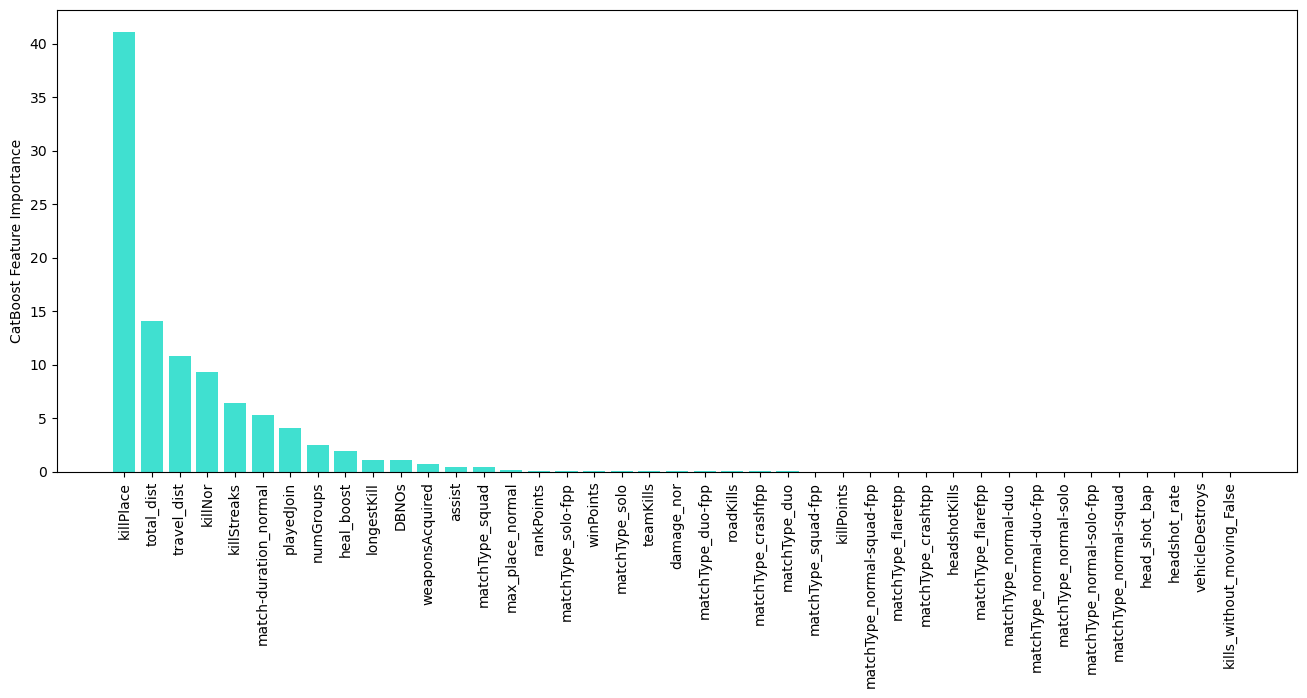

In [95]:
plt.bar(feature_imp.features, feature_imp.importance, color='turquoise')
plt.ylabel("CatBoost Feature Importance")
plt.xticks(rotation = 90)
plt.show()
##  it is showing bar plot of the which parameter depend on what persent  

In [87]:
pred =  model.predict(x_test)

In [88]:
rmse =  np.sqrt(mean_squared_error(y_test ,  pred)) 
sco =  model.score(x_test , y_test)

In [92]:
print("how much  persent  our  model give accurete prediction : " , sco*100) 
print("how much  persent our model  give the wrong prediction : " , rmse*100)

how much  persent  our  model give accurete prediction   92.78791717149892
how much  persent our model  give the wrong prediction  8.255898599779238


In [93]:
print("complete")

complete


<center><img src = "https://media.giphy.com/media/KB89dMAtH79VIvxNCW/giphy.gif"></center>